In [1]:
# Importing in each cell because of the kernel restarts.
import scrapy
from scrapy.crawler import CrawlerProcess

In [2]:
class ESSpider(scrapy.Spider):
    # Naming the spider is important if you are running more than one spider of
    # this class simultaneously.
    name = "ESS"
    
    # URL(s) to start with.
    start_urls = [
        'https://news.google.com/?hl=en-US&gl=US&ceid=US:en',
    ]
    
     # Use XPath to parse the response we get.
    def parse(self, response):
        
        # Iterate over every <article> element on the page.
        for article in response.xpath('//article'):
            
            # Yield a dictionary with the values we want.
            yield {
                # This is the code to choose what we want to extract
                # You can modify this with other Xpath expressions to extract other information from the site
                'news': article.xpath('div/div/h3/a/span/text()').extract_first(),
                'source': article.xpath('div/div/div[@class="PNwZO zhsNkd"]/a[@class="KbnJ8"]/text()').extract_first(),
                'time': article.xpath('div/div/time[@class="WW6dff"]/text()').extract()
            }

# Tell the script how to run the crawler by passing in settings.
process = CrawlerProcess({
    'FEED_FORMAT': 'json',         # Store data in JSON format.
    'FEED_URI': 'googlenewspage.json',  # Name our storage file.
    'LOG_ENABLED': False           # Turn off logging for now.
})

# Start the crawler with our spider.
process.crawl(ESSpider)
process.start()
print('Success!')


Success!


In [3]:
import pandas as pd

firstpage = pd.read_json('/Users/saurabh/googlenewspage.json', orient='records')
print(firstpage.shape)
print(firstpage.head())

(175, 3)
                                                news           source  \
0  Trump Administration Mulls Punishment for Saud...  The Daily Beast   
1                                               None              CNN   
2                                               None             None   
3                                               None             None   
4                                               None             None   

               time  
0     [2 hours ago]  
1  [36 minutes ago]  
2           [today]  
3           [today]  
4     [5 hours ago]  


In [4]:
df = firstpage.dropna()

In [5]:
df.source.unique()

array(['The Daily Beast', 'CNN', 'USA TODAY', 'CNBC',
       'The Washington Post', 'The Telegraph', 'The New York Times',
       'The Wall Street Journal', 'The Verge', 'MarketWatch', 'Engadget',
       'Android Police', 'GameSpot', 'Slate', 'Deadspin', 'NPR',
       'CBS News', 'Al Jazeera English'], dtype=object)

In [6]:
df.count()

news      24
source    24
time      24
dtype: int64

In [7]:
new_df = pd.DataFrame(df.groupby(['source'])['news'].count()).reset_index()
new_df.columns = ['source','source_count']
new_df

,source,source_count
0,Al Jazeera English,1
1,Android Police,1
2,CBS News,1
3,CNBC,1
4,CNN,4
5,Deadspin,1
6,Engadget,1
7,GameSpot,1
8,MarketWatch,1
9,NPR,1


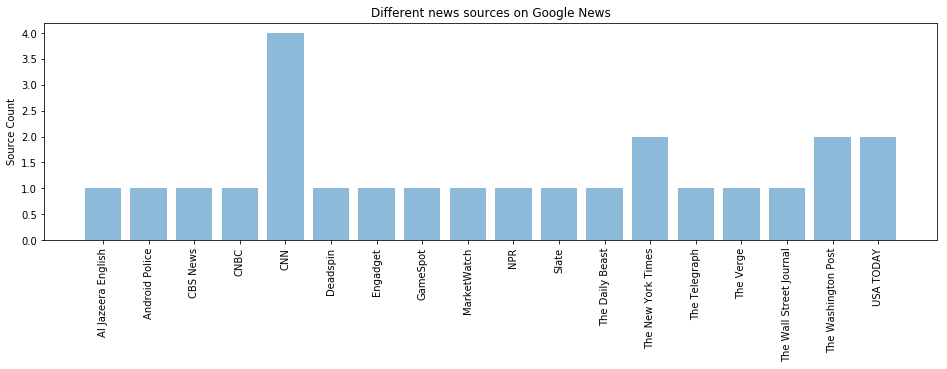

In [10]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(len(new_df['source']))
y1 = new_df['source_count']
plt.figure(figsize=(16,4))
p1=plt.bar(x, y1, align='center', alpha=0.5)
plt.xticks(x, new_df['source'],rotation='vertical')
plt.ylabel("Source Count")
plt.title("Different news sources on Google News")
plt.show()

The above graph helps us to analyse the data as it shows highest number of news coming from CNN after that The New York Times, The Washington Post and USA TODAY also providing news good amount of news compared to others.